# 1. 데이터 불러오기와 데이터셋 나누기

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('/content/drive/MyDrive/G_ML_2/data/Fvote.csv', encoding='utf-8')

In [5]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [6]:
y=data[['vote']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

# 2. Grid Search 

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid={'n_estimators': range(100, 1000, 100), 
            'max_features': ['auto', 'sqrt', 'log2']}

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 1000, 100)},
             return_train_score=True)

In [14]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'max_features': 'log2', 'n_estimators': 900}


In [15]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.651


In [16]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.792


In [17]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [18]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.158791,0.008788,0.016570,0.004549,auto,100,"{'max_features': 'auto', 'n_estimators': 100}",0.71875,0.68750,0.65625,0.548387,0.580645,0.638306,0.064224,6,1.0,1.0,1.0,1.0,0.992126,0.998425,0.00315
1,0.285303,0.006143,0.024068,0.002544,auto,200,"{'max_features': 'auto', 'n_estimators': 200}",0.71875,0.68750,0.65625,0.548387,0.612903,0.644758,0.059558,2,1.0,1.0,1.0,1.0,1.000000,1.000000,0.00000
2,0.421728,0.008479,0.032843,0.001122,auto,300,"{'max_features': 'auto', 'n_estimators': 300}",0.68750,0.68750,0.65625,0.548387,0.580645,0.632056,0.057231,14,1.0,1.0,1.0,1.0,1.000000,1.000000,0.00000
3,0.570473,0.028697,0.041078,0.001194,auto,400,"{'max_features': 'auto', 'n_estimators': 400}",0.71875,0.68750,0.65625,0.580645,0.548387,0.638306,0.064224,6,1.0,1.0,1.0,1.0,1.000000,1.000000,0.00000
4,0.694463,0.016156,0.061397,0.014038,auto,500,"{'max_features': 'auto', 'n_estimators': 500}",0.68750,0.68750,0.65625,0.580645,0.580645,0.638508,0.048603,5,1.0,1.0,1.0,1.0,1.000000,1.000000,0.00000
5,0.821507,0.006761,0.068309,0.004651,auto,600,"{'max_features': 'auto', 'n_estimators': 600}",0.71875,0.68750,0.65625,0.548387,0.580645,0.638306,0.064224,6,1.0,1.0,1.0,1.0,1.000000,1.000000,0.00000
6,0.971818,0.009759,0.078596,0.008798,auto,700,"{'max_features': 'auto', 'n_estimators': 700}",0.71875,0.68750,0.65625,0.580645,0.548387,0.638306,0.064224,6,1.0,1.0,1.0,1.0,1.000000,1.000000,0.00000
7,1.119040,0.002431,0.091637,0.009316,auto,800,"{'max_features': 'auto', 'n_estimators': 800}",0.71875,0.68750,0.65625,0.580645,0.580645,0.644758,0.055955,2,1.0,1.0,1.0,1.0,1.000000,1.000000,0.00000
8,1.252528,0.031669,0.103646,0.017742,auto,900,"{'max_features': 'auto', 'n_estimators': 900}",0.71875,0.65625,0.65625,0.580645,0.548387,0.632056,0.060548,14,1.0,1.0,1.0,1.0,1.000000,1.000000,0.00000
9,0.143711,0.006517,0.012934,0.000663,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",0.65625,0.71875,0.62500,0.548387,0.516129,0.612903,0.073152,26,1.0,1.0,1.0,1.0,1.000000,1.000000,0.00000


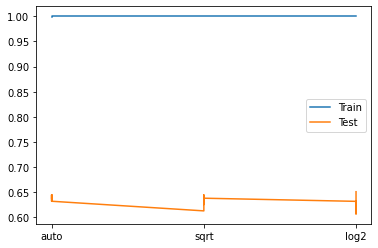

In [19]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

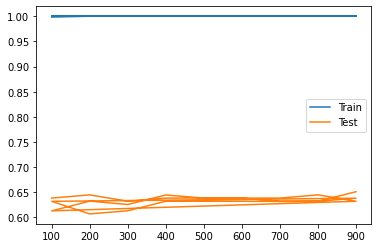

In [20]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
from scipy.stats import randint

In [23]:
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [26]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc4b8d57890>},
                   return_train_score=True)

In [27]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'max_features': 'auto', 'n_estimators': 180}


In [28]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.651


In [29]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.792


In [30]:
result_random = random_search.cv_results_

In [31]:
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.265603,0.006864,0.023209,0.003125,auto,180,"{'max_features': 'auto', 'n_estimators': 180}",0.71875,0.65625,0.65625,0.612903,0.612903,0.651411,0.038851,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.687258,0.008292,0.053807,0.005322,sqrt,494,"{'max_features': 'sqrt', 'n_estimators': 494}",0.71875,0.71875,0.65625,0.548387,0.548387,0.638105,0.076727,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.871594,0.026141,0.068437,0.011849,log2,607,"{'max_features': 'log2', 'n_estimators': 607}",0.71875,0.68750,0.65625,0.548387,0.548387,0.631855,0.070959,7,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.732504,0.012446,0.055859,0.003741,log2,520,"{'max_features': 'log2', 'n_estimators': 520}",0.78125,0.65625,0.65625,0.548387,0.548387,0.638105,0.086311,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.020611,0.007787,0.077438,0.003867,sqrt,744,"{'max_features': 'sqrt', 'n_estimators': 744}",0.75000,0.68750,0.65625,0.580645,0.548387,0.644556,0.072708,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,0.269882,0.005481,0.023213,0.002049,auto,194,"{'max_features': 'auto', 'n_estimators': 194}",0.62500,0.68750,0.65625,0.580645,0.548387,0.619556,0.050143,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,0.827844,0.006521,0.063645,0.006208,log2,599,"{'max_features': 'log2', 'n_estimators': 599}",0.75000,0.68750,0.65625,0.580645,0.516129,0.638105,0.081816,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,0.499405,0.006372,0.039432,0.001466,log2,362,"{'max_features': 'log2', 'n_estimators': 362}",0.65625,0.65625,0.65625,0.548387,0.548387,0.613105,0.052842,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,0.603406,0.009132,0.048421,0.003923,sqrt,435,"{'max_features': 'sqrt', 'n_estimators': 435}",0.65625,0.65625,0.65625,0.548387,0.548387,0.613105,0.052842,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,0.926459,0.011317,0.092451,0.040174,sqrt,659,"{'max_features': 'sqrt', 'n_estimators': 659}",0.75000,0.68750,0.65625,0.548387,0.580645,0.644556,0.072708,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0


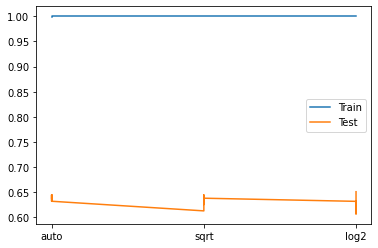

In [32]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

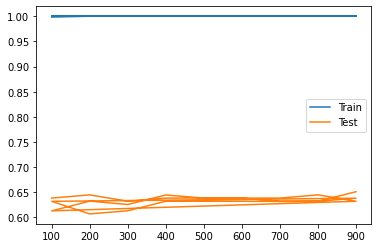

In [33]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
Forest=RandomForestClassifier(max_features='auto', n_estimators=492)

In [36]:
Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=492)

In [37]:
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.03003305 0.02891981 0.02555566 0.02335401 0.02390444 0.03306769
 0.02293213 0.07273851 0.08957464 0.10803805 0.12536141 0.12760521
 0.28891541]


In [38]:
import matplotlib.pyplot as plt
import numpy as np

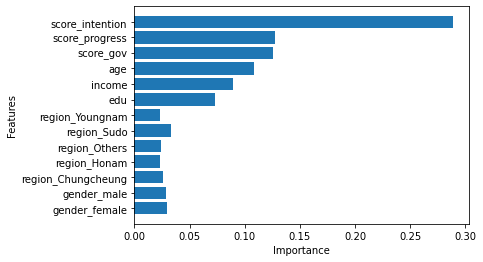

In [39]:
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_forest(Forest)

# 4. 모델평가

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
Forest=RandomForestClassifier(max_features='auto', n_estimators=492)

In [42]:
Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=492)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
pred_train=Forest.predict(X_train)

In [45]:
confusion_train=confusion_matrix(y_train, pred_train)

In [46]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 48   0]
 [  0 110]]


In [47]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[ 3 10]
 [ 5 35]]


In [48]:
from sklearn.metrics import f1_score

In [49]:
f1=f1_score(y_test, pred_test)

In [50]:
print("f1 score:\n", f1)

f1 score:
 0.823529411764706


In [51]:
from sklearn.metrics import classification_report

In [52]:
cfreport=classification_report(y_test, pred_test)

In [53]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.38      0.23      0.29        13
           1       0.78      0.88      0.82        40

    accuracy                           0.72        53
   macro avg       0.58      0.55      0.55        53
weighted avg       0.68      0.72      0.69        53



# 5. 다중분류적용

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import pandas as pd

In [57]:
data=pd.read_csv('/content/drive/MyDrive/G_ML_2/data/vote.csv', encoding='utf-8')

In [58]:
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [59]:
X=data[['gender', 'region', 'edu', 'income', 'age', 
        'score_gov', 'score_progress', 'score_intention']]

In [60]:
y=data[['parties']]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
from scipy.stats import randint

In [65]:
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [68]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc4b8b7a210>},
                   return_train_score=True)

In [69]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'max_features': 'sqrt', 'n_estimators': 570}


In [70]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.456


In [71]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.509


In [72]:
result_random = random_search.cv_results_

In [73]:
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.691025,0.026748,0.050113,0.002191,log2,475,"{'max_features': 'log2', 'n_estimators': 475}",0.31250,0.43750,0.50000,0.483871,0.483871,0.443548,0.068773,6,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878
1,1.027578,0.004857,0.076696,0.003480,log2,730,"{'max_features': 'log2', 'n_estimators': 730}",0.31250,0.43750,0.50000,0.483871,0.483871,0.443548,0.068773,6,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878
2,1.092826,0.009969,0.100629,0.030428,log2,773,"{'max_features': 'log2', 'n_estimators': 773}",0.28125,0.43750,0.50000,0.516129,0.483871,0.443750,0.085391,3,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878
3,0.843609,0.052310,0.066191,0.004548,sqrt,567,"{'max_features': 'sqrt', 'n_estimators': 567}",0.34375,0.40625,0.50000,0.516129,0.483871,0.450000,0.065151,2,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878
4,0.936490,0.009887,0.071319,0.002845,log2,583,"{'max_features': 'log2', 'n_estimators': 583}",0.28125,0.43750,0.46875,0.483871,0.483871,0.431048,0.076789,9,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878
5,0.444733,0.088964,0.034842,0.009906,sqrt,225,"{'max_features': 'sqrt', 'n_estimators': 225}",0.28125,0.43750,0.46875,0.483871,0.516129,0.437500,0.082126,8,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878
6,0.487714,0.012395,0.037610,0.002769,log2,341,"{'max_features': 'log2', 'n_estimators': 341}",0.31250,0.46875,0.43750,0.483871,0.516129,0.443750,0.070341,3,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878
7,1.160148,0.012801,0.092025,0.006675,sqrt,835,"{'max_features': 'sqrt', 'n_estimators': 835}",0.28125,0.40625,0.43750,0.483871,0.516129,0.425000,0.081169,10,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878
8,0.802936,0.010401,0.058893,0.001040,sqrt,570,"{'max_features': 'sqrt', 'n_estimators': 570}",0.37500,0.43750,0.50000,0.483871,0.483871,0.456048,0.045591,1,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878
9,0.422820,0.005633,0.033701,0.003705,auto,302,"{'max_features': 'auto', 'n_estimators': 302}",0.31250,0.40625,0.50000,0.516129,0.483871,0.443750,0.075691,3,0.992063,1.0,0.992063,0.992126,1.0,0.995251,0.003878


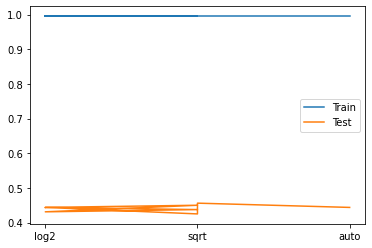

In [74]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_max_features'], 
         result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_max_features'], 
         result_random['mean_test_score'], label="Test")
plt.legend()

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
Forest=RandomForestClassifier(max_features='log2', n_estimators=478)

In [77]:
Forest.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=478)

In [78]:
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.05572418 0.11243917 0.07485585 0.10463282 0.08974363 0.17847768
 0.14113289 0.24299379]


In [79]:
import matplotlib.pyplot as plt
import numpy as np

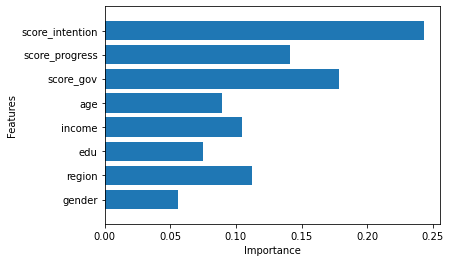

In [80]:
def plot_feature_importances_Forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_Forest(Forest)

In [81]:
from sklearn.metrics import confusion_matrix
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[36  0  1  0]
 [ 0 37  0  0]
 [ 0  0 19  0]
 [ 0  0  0 65]]


In [82]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[ 5  2  1  5]
 [ 1  9  2  4]
 [ 3  0  2  1]
 [ 1  2  1 14]]


In [83]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred_test, average="micro" )
f2=f1_score(y_test, pred_test, average="macro" )

In [84]:
print("micro f1 score:\n", f1)
print("macro f1 score:\n", f2)

micro f1 score:
 0.5660377358490566
macro f1 score:
 0.5138680659670165


In [85]:
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           1       0.50      0.38      0.43        13
           2       0.69      0.56      0.62        16
           3       0.33      0.33      0.33         6
           4       0.58      0.78      0.67        18

    accuracy                           0.57        53
   macro avg       0.53      0.51      0.51        53
weighted avg       0.57      0.57      0.56        53

